<a href="https://colab.research.google.com/github/profmatgc/analise_macroeconomica/blob/main/analise_macroeconomica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📈 ANÁLISE MACROECONÔMICA

## 📄 Descrição
Este projeto utiliza a **fredapi**, uma biblioteca Python para extração de dados do **FRED** (*Federal Reserve Economic Data*), fornecidos pelo *Federal Reserve Bank of St. Louis*.

O objetivo é transformar dados brutos em inteligência financeira, sendo capaz de:

* 🚨 Gerar alertas de recessões econômicas;
* 💸 Monitorar métricas de inflação;
* 💰 Fornecer recomendações de investimentos;
* 📊 Produzir estatísticas, gráficos e tabelas detalhadas.

## 💻 Ferramentas e Tecnologias
* **Linguagem:** Python
* **Ambiente:** Google Colab

<br>

> **Nota:** Todo o fundamento teórico deste projeto tem como alicerce a **Escola Austríaca de Economia**.

# Dependências

In [1]:
!pip install fredapi
from fredapi import Fred

import pandas as pd
import matplotlib.pyplot as plt

# Acessando os dados

In [2]:
'''
Cadastre-se ou faça login no site do FRED para obter sua chave particular.
Link: https://fredaccount.stlouisfed.org/apikeys
'''

chave = 'SUA_CHAVE_PARTICULAR'
fred = Fred(api_key=chave.lower())

# Inflação real com base no M2 e no M2V

In [3]:
# Métricas para inflação
serie_m2 = fred.get_series('WM2NS')
serie_m2v = fred.get_series('M2V')

data = pd.DataFrame(serie_m2).rename(columns={0: 'm2'})
data = data.join(serie_m2v.rename('m2v')).ffill()

# Considerando um ciclo econômico de 5 anos
data['m2_5y_%'] = ((data['m2'] / data['m2'].shift(260)) - 1) * 100
data['m2v_5y_%'] = ((data['m2v'] / data['m2v'].shift(260)) - 1) * 100

# Nova métrica: inflação real
data['inflacao_real'] = data['m2_5y_%'] + data['m2v_5y_%']

data = data.dropna()
data

,m2,m2v,m2_5y_%,m2v_5y_%,inflacao_real
1989-09-25,3068.1,1.795,36.779457,-1.265127,35.514330
1989-10-02,3089.2,1.795,36.587523,-1.265127,35.322396
1989-10-09,3114.4,1.795,37.397979,-1.265127,36.132853
1989-10-16,3117.6,1.795,38.148624,-1.265127,36.883498
1989-10-23,3105.3,1.795,37.847916,-1.265127,36.582789
...,...,...,...,...,...
2025-11-03,22303.7,1.394,17.895466,-4.126547,13.768918
2025-11-10,22274.1,1.394,17.225935,-4.126547,13.099388
2025-11-17,22333.6,1.394,17.695790,-4.126547,13.569242
2025-11-24,22307.2,1.394,17.064365,-4.126547,12.937817


In [4]:
# Estatísticas
data.describe()

,m2,m2v,m2_5y_%,m2v_5y_%,inflacao_real
count,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000
mean,9445.965484,1.803189,33.215481,-2.516738,30.698743
std,5961.552192,0.255767,11.397886,10.720409,10.910692
min,3068.100000,1.377000,8.311696,-20.415400,8.419921
25%,4280.500000,1.571000,28.806754,-8.889912,22.599913
50%,7407.100000,1.850000,33.993235,-1.265127,31.252349
75%,13183.400000,1.974000,39.002789,2.451253,36.457799
max,22429.800000,2.171000,64.086273,18.112384,56.638788


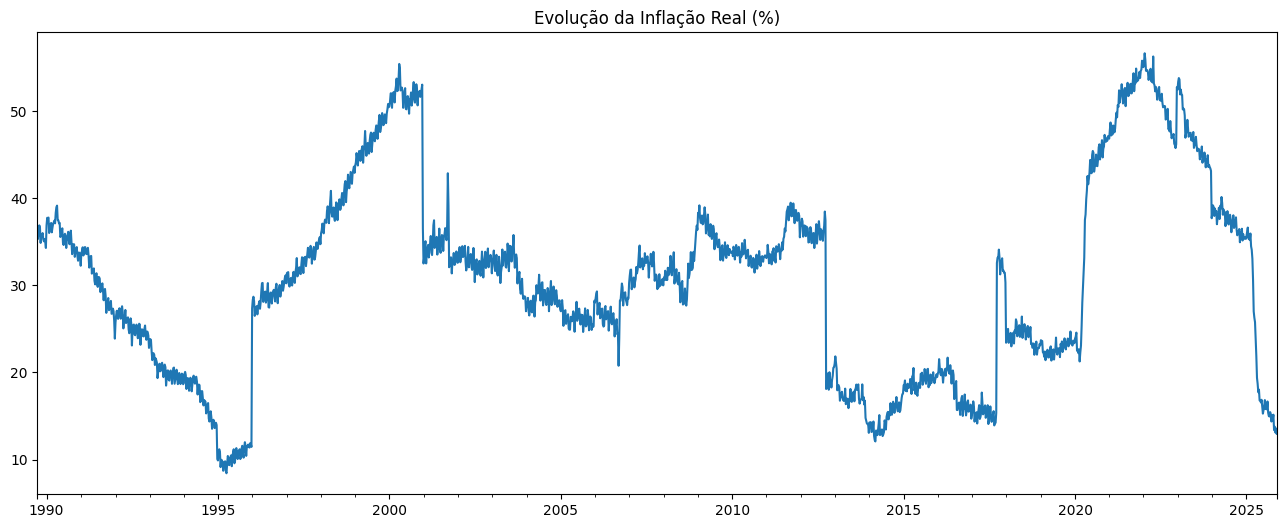

In [5]:
# Gráfico 1
fig, ax = plt.subplots(figsize=(16, 6))

data['inflacao_real'].plot(
    kind='line',
    ax=ax,
    title='Evolução da Inflação Real (%)',
    color='#1f77b4'
    )

plt.show()

# Alerta de recessão com base na inversão da curva de juros

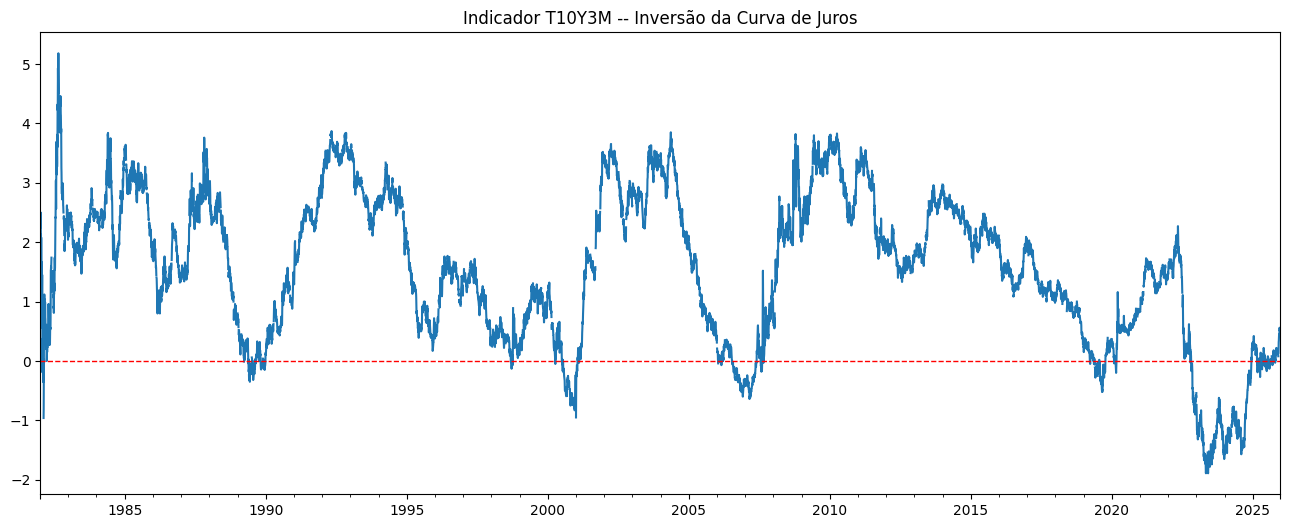

In [6]:
'''
T10Y3M: 10-Year Treasury Constant Maturity Minus
3-Month Treasury Constant Maturity

Valores abaixo do eixo 0 indicam recessão.
'''
serie_recessao = fred.get_series('T10Y3M')

data2 = pd.DataFrame(serie_recessao)
data2.columns = ['recessao']

# Gráfico 2
fig, ax = plt.subplots(figsize=(16, 6))

data2['recessao'].plot(
    kind='line',
    ax=ax,
    title='Indicador T10Y3M -- Inversão da Curva de Juros',
    color='#1f77b4'
    )

ax.axhline(0, color='red', linestyle='--', linewidth=1)

plt.show()

In [7]:
# Alerta com recomendação de investimento
valor_atual = data['inflacao_real'].iloc[-1]

cenario_macroeconomico_atual = data2['recessao'].iloc[-1]
alerta_de_crise = cenario_macroeconomico_atual < 0

if alerta_de_crise:
  print('🔴 ALERTA DE CRISE: Investir em ativos reais (ouro, prata, comida, etc).')

else:
  print('🟢 CENÁRIO ESTÁVEL: Investir em ativos com retorno acima de...\n')
  print('    -> {} % no curto prazo;'.format(round(valor_atual), 2))
  print('    -> {} % no médio e longo prazo.'.format(round(data['inflacao_real'].mean(), 2)))

🟢 CENÁRIO ESTÁVEL: Investir em ativos com retorno acima de...

    -> 13 % no curto prazo;
    -> 30.7 % no médio e longo prazo.
